In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats


ids: идентификатор твита (например, 4587) 
date: дата твита (например, сб, 16 мая, 23:58:44 UTC 2009 г.)
флаг: запрос (например, lyx). Если запроса нет, то это значение равно NO_QUERY.
пользователь: пользователь, который написал твит (например, bobthebuilder)
текст: текст твита (например, Ликс классная)

In [2]:
df = pd.read_csv('ProjectTweets.csv')
# looking at the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df.rename(columns={'0': 'number','1467810369':'id','Mon Apr 06 22:19:45 PDT 2009': 'date','NO_QUERY': 'flag','_TheSpecialOne_': 'user' }, inplace=True)



In [4]:
df.head()

,number,id,date,flag,user,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
new_column_name = 'text'
df.rename(columns={df.columns[5]: new_column_name}, inplace=True)

df.head()

,number,id,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df['flag'].value_counts()

flag
NO_QUERY    1599999
Name: count, dtype: int64

In [7]:
df=df.drop(columns=['number','id', 'flag'])
df.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


df1 = df
df1.to_csv("df1.csv")

In [8]:
# Text transformation to lowercase
df['text'] =df['text'].str.lower()
df['text']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [9]:
# URL removal from text
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df["text"]

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [10]:
import string

In [11]:
# Punctuation from text
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichan i dived many times for the ball manag...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom  very cool to hear old walt intervie...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [12]:
# Single character and double space removal from the text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [13]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(str)
df["text"] = df["text"].apply(remove_emoji)
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [14]:
# Single character and double space removal from text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [15]:
# Most common words in the text
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 556063),
 ('the', 517438),
 ('my', 312073),
 ('you', 263475),
 ('and', 263066),
 ('it', 223549),
 ('is', 223104),
 ('in', 197411),
 ('for', 195146),
 ('of', 176815)]

In [16]:
df_new=df
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [17]:
df_new.user.value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [18]:
# df_new.to_csv('df_new.txt', sep='\t', index=False)

# вывести на мап редюсу топ 10 юзеров!!! сохранить результаты 
### Сохранение данных и последующий анализ выходных данных. При необходимости его можно извлечь из базы данных NoSQL в другой формат с помощью соответствующего инструмента (например, извлечь в CSV для импорта в R/Python и т. д.).

In [20]:
# top 10 users
from collections import Counter
cnt = Counter()
for text in df_new["user"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('lost_dog', 549),
 ('webwoke', 345),
 ('tweetpet', 310),
 ('SallytheShizzle', 281),
 ('VioletsCRUK', 279),
 ('mcraddictal', 276),
 ('tsarnick', 248),
 ('what_bugs_u', 246),
 ('Karen230683', 238),
 ('DarkPiano', 236)]

In [21]:
top_10_users = cnt.most_common(10)

In [22]:
top_10_users = pd.DataFrame(top_10_users, columns=["User", "Tweet count"])

# Вывод таблицы
print(top_10_users)

              User  Tweet count
0         lost_dog          549
1          webwoke          345
2         tweetpet          310
3  SallytheShizzle          281
4      VioletsCRUK          279
5      mcraddictal          276
6         tsarnick          248
7      what_bugs_u          246
8      Karen230683          238
9        DarkPiano          236


In [23]:
top_10_users.head(10)

,User,Tweet count
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236


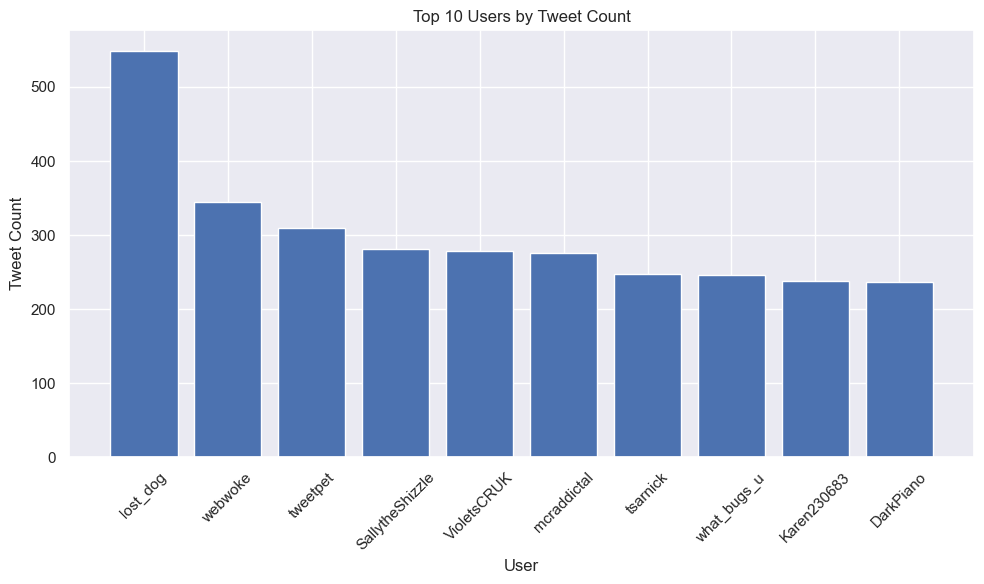

In [25]:
# Получение данных для графика
user_counts = cnt.most_common(10)
users = [user[0] for user in user_counts]
tweet_counts = [user[1] for user in user_counts]

# Создание графика
plt.figure(figsize=(10, 6))
plt.bar(users, tweet_counts)
plt.xlabel("User")
plt.ylabel("Tweet Count")
plt.title("Top 10 Users by Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Отображение графика
plt.show()





# определить в какой день было больше всего твитов

df_new.to_csv("df_new.csv")



# Сохранение данных в текстовый файл
df_new.to_csv('df_new.txt', sep='\t', index=False)


In [ ]:
#msno.matrix(df) 

In [ ]:
# Преобразование столбца с датой в формат datetime
#df['date'] = pd.to_datetime(df['date']).dt.date 

In [ ]:
#df.head()

In [ ]:
#df.to_csv("df_time.csv")

In [ ]:
#from pyspark.sql import SparkSession 
#spark = SparkSession.builder.appName("Jupyter Notebook").getOrCreate()


In [ ]:
#spark

In [ ]:
#sc = spark.sparkContext

# Import regex module
#import re
#from operator import add

# Read input file from hadoop directory
# Copy a file from the local folder to hadoop folder
#file_in = sc.textFile('/user1/ProjectTweets.csv')